# Pymaceuticals Inc.
---

### Analysis

The purpose of this review was to compare the performance of a new cancer treatment, Capomulin, against other treatment regimens in a study of 249 mice with squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

Of the 249 mice, one line contained duplicate data points and was purged from the dataset, leaving 248 unique mice studied over a time frame extending at most to 45 days. This data set contained an equitable mixture of male and female mi,  (51 to 49 percent, respective.
.

Over the course of the study, mice treated with Capomulin saw a lower average final tumor volume, comparable to performance observed with Ramicane. By study’s end, Capomulin saw a drop of average tumor volume of 19.5% (45 mm3 vs 36.2 mm3) with 21 of 25 mice surviving the trial. 

Ramicane outperformed Capomulin in this regard with a drop of average tumor volume of 22.3% (45 mm3 vs 35.0 mm3) with 20 of 25 mice surviving the trial.

Other treatments had significantly worse results, with all other treatments averaging an increase of average tumor volume of 49.6% (45 mm3 vs 67.3 mm3) with an average of only 11.25 of 25 mice making it to day 45.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(pd.unique(mouse_complete["Mouse ID"]))


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_complete[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
odd_mouse_out = pd.unique(duplicate_rows["Mouse ID"])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_complete[mouse_complete["Mouse ID"].isin(odd_mouse_out)]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_complete =  mouse_complete[~mouse_complete["Mouse ID"].isin(odd_mouse_out)]
clean_mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_mouse_complete["Mouse ID"]))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medians = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variances = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_deviations = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sems = clean_mouse_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume" : means,
                              "Median Tumor Volume" : medians,
                              "Tumor Volume Variance" : variances,
                              "Tumor Volumestd" : std_deviations,
                              "Tumor Volumesem" : sems
                             })

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volumestd,Tumor Volumesem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = clean_mouse_complete.groupby(["Drug Regimen"]) \
                                        .agg({"Tumor Volume (mm3)":["mean","sum","var","std","sem"]}) 
agg_summary_stats

Tumor Volume (mm3)                                             
                           mean           sum        var       std       sem
Drug Regimen                                                                
Capomulin             40.675741   9355.420462  24.947764  4.994774  0.329346
Ceftamin              52.591172   9361.228582  39.290177  6.268188  0.469821
Infubinol             52.884795   9413.493529  43.128684  6.567243  0.492236
Ketapril              55.235638  10384.299876  68.553577  8.279709  0.603860
Naftisol              54.331565  10105.671026  66.173479  8.134708  0.596466
Placebo               54.033581   9780.078122  61.168083  7.821003  0.581331
Propriva              52.320930   7743.497619  43.852013  6.622085  0.544332
Ramicane              40.216745   9169.417875  23.486704  4.846308  0.320955
Stelasyn              54.233149   9816.199991  59.450562  7.710419  0.573111
Zoniferol             53.236507   9689.044192  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

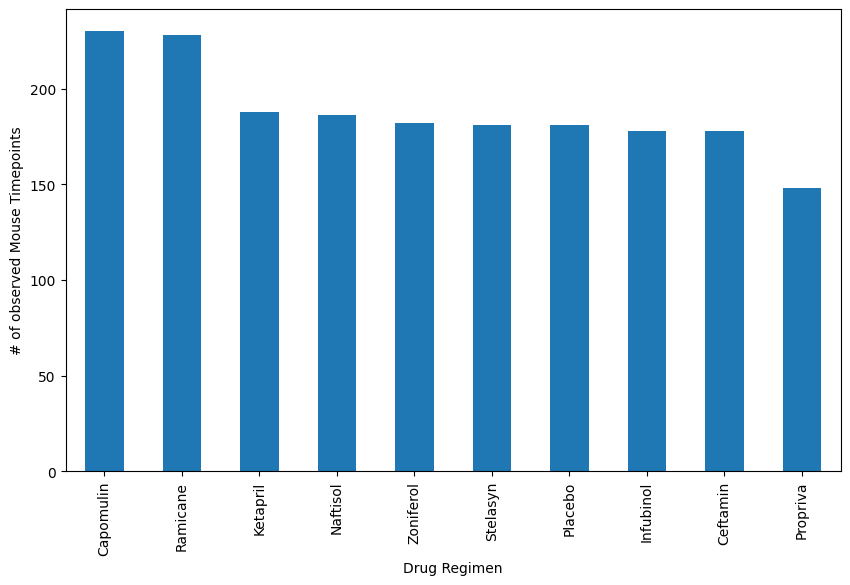

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_complete["Drug Regimen"].value_counts()
pandasBar = regimen_counts.plot(kind='bar', figsize=(10, 6))
pandasBar.set_ylabel("# of observed Mouse Timepoints")
plt.show



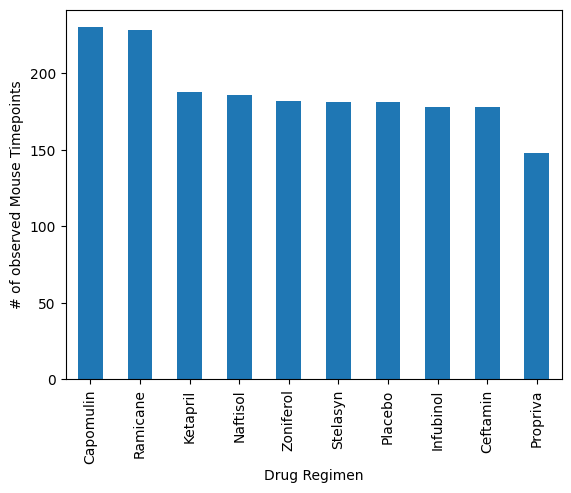

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
figure1 = regimen_counts.plot(kind = "bar", ylabel="# of observed Mouse Timepoints")
xticklabels = regimen_counts.index
plt.show()

In [21]:
# Pivot table to identify count of timepoints. 
# Drugs with lower count of later timepoints indicate mouse death?
pd.pivot_table(clean_mouse_complete, values= "Mouse ID", columns = ["Timepoint"], aggfunc = "count", index = ["Drug Regimen"])

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug Regimen,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,24,23,21,15,15,13,12,9,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,24,23,21,21,19,18,17,15,12,11


In [23]:
# Pivot table to identify average tumor volumes at timepoint. 
# Drugs with lower count of later timepoints indicate mouse death?
pd.pivot_table(clean_mouse_complete, values= "Tumor Volume (mm3)", columns = ["Timepoint"], aggfunc = "mean", index = ["Drug Regimen"])

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug Regimen,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,46.541247,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.168130,48.938560,50.891769,53.127384,55.462490,58.122548,60.103457,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.470830,49.335368,51.448025,53.970080,56.172821,59.870528,62.432021,65.356386,68.438310


<Axes: ylabel='Sex'>

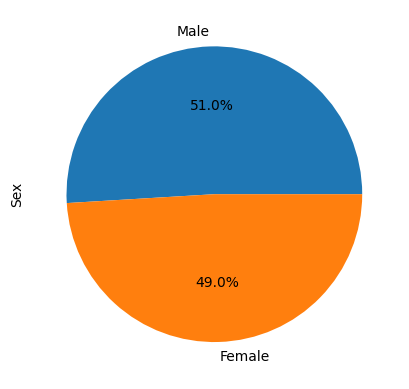

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_mouse_complete["Sex"].value_counts().index
sizes = clean_mouse_complete["Sex"].value_counts().reset_index()
sizes.columns = ["Label","Sex"] 
sizes.plot(kind="pie",autopct="%1.1f%%", y= "Sex", labels=labels, legend=False)


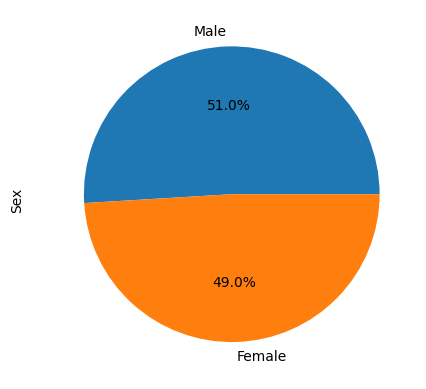

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes["Sex"],labels=labels, autopct="%1.1f%%")
plt.text(-1.5, -.1, 'Sex', fontsize=10, color='black', rotation=90)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_data = clean_mouse_complete.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_final = pd.merge(grouped_data, clean_mouse_complete, on=["Mouse ID", "Timepoint"], how="inner")


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_temp_list = mouse_data_final.loc[mouse_data_final["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
        
    # add subset 
    tumor_volume_list.append(tumor_volume_temp_list)

for i in range(len(treatment_regimens)):
    # initialize upper and lower bounds
    quartiles = tumor_volume_list[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume_list[i].loc[(tumor_volume_list[i] <lower_bound) | (tumor_volume_list[i] > upper_bound)]

    #print statement
    print(f"{treatment_regimens[i]}'s potential outliers: {outliers}")  
                                              

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


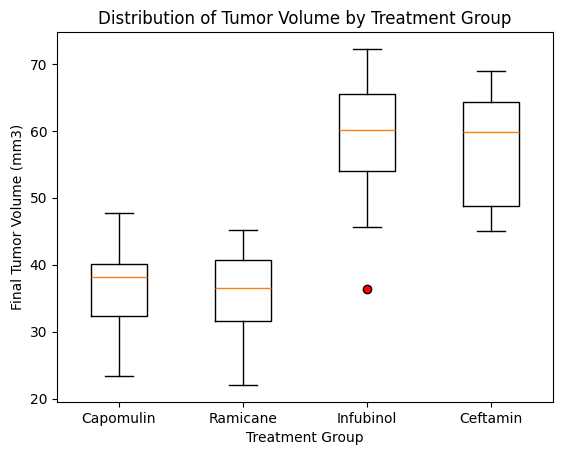

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()    # creates plot elements we can easily alter
ax1.set_title('Distribution of Tumor Volume by Treatment Group')   #titles graph
ax1.set_ylabel('Final Tumor Volume (mm3)')     # y label
ax1.set_xlabel("Treatment Group")              # x label
ax1.boxplot(tumor_volume_list, 0, sym ="o", 
            flierprops = {"markerfacecolor":'red'}, labels=treatment_regimens)   #creates box plot and formats outlier

plt.show() # render plot

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

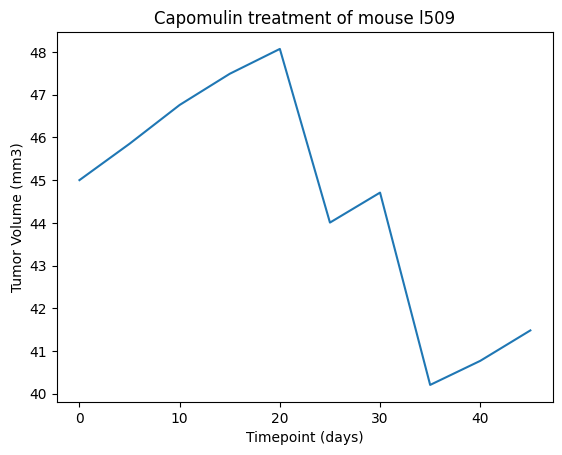

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#filter data to just mouse l509 as shown in example 
filtered_data = clean_mouse_complete[
    (clean_mouse_complete["Mouse ID"] == "l509")]

#creating line plot for singular mouse
fig2,ax2 = plt.subplots()    # creates plot elements we can easily alter
ax2.plot("Timepoint","Tumor Volume (mm3)", data= filtered_data)     # creates line plot
ax2.set(xlabel= "Timepoint (days)", ylabel = "Tumor Volume (mm3)",  # labels axes and title
       title= "Capomulin treatment of mouse l509")

plt.show # render plot

<Axes: title={'center': 'Mice Treated with Capomulin'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

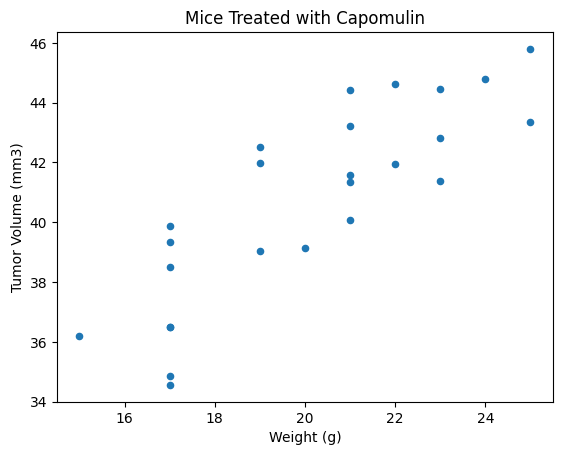

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_complete[
    (clean_mouse_complete["Drug Regimen"] == "Capomulin")  # filter date down to just mice treated with capomulin
    ]

# runs aggregation on filtered data to pull mean from muliple columns and add to their own data frame
capomulin_data_averages = capomulin_data.groupby(["Mouse ID"])\
                                        .agg({"Tumor Volume (mm3)":"mean",  
                                              "Weight (g)":"mean"           
                                             })     
# plot data as a scatter plot
capomulin_data_averages.plot(kind="scatter", x= "Weight (g)", y= "Tumor Volume (mm3)", 
                             title= "Mice Treated with Capomulin")


## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

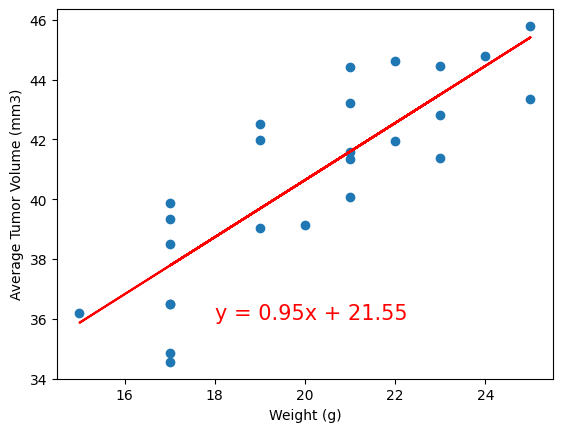

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# assign values to axes 
x_values = capomulin_data_averages["Weight (g)"] 
y_values = capomulin_data_averages["Tumor Volume (mm3)"]

# perform linear regression to data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# format and save line equation for presentation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# creating plots
plt.scatter(capomulin_data_averages["Weight (g)"], 
            capomulin_data_averages["Tumor Volume (mm3)"]) #create scatter plot
plt.plot(x_values,regress_values,"r-") # append linear regression line to graph
plt.annotate(line_eq,(18,36),fontsize=15,color="red") # add line equation
plt.xlabel("Weight (g)")  # add x axis label
plt.ylabel("Average Tumor Volume (mm3)") # add y axis label
           
plt.show # render plot